## DATA PREPROCESSING

#### Import relevant libraries

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#### load dataset

In [2]:
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


#### print summary table of all columns

In [3]:
df.describe(include='all')

,total_bill,tip,sex,smoker,day,time,size
count,244.000000,244.000000,244,244,244,244,244.000000
unique,NaN,NaN,2,2,4,2,NaN
top,NaN,NaN,Male,No,Sat,Dinner,NaN
freq,NaN,NaN,157,151,87,176,NaN
mean,19.785943,2.998279,NaN,NaN,NaN,NaN,2.569672
std,8.902412,1.383638,NaN,NaN,NaN,NaN,0.951100
min,3.070000,1.000000,NaN,NaN,NaN,NaN,1.000000
25%,13.347500,2.000000,NaN,NaN,NaN,NaN,2.000000
50%,17.795000,2.900000,NaN,NaN,NaN,NaN,2.000000
75%,24.127500,3.562500,NaN,NaN,NaN,NaN,3.000000


#### CHecking null values

In [4]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

#### Checking and dropping duplicated values

In [5]:
df.duplicated().sum()

1

In [6]:
df.drop_duplicates(inplace=True)
df.describe(include='all')

,total_bill,tip,sex,smoker,day,time,size
count,243.000000,243.000000,243,243,243,243,243.000000
unique,NaN,NaN,2,2,4,2,NaN
top,NaN,NaN,Male,No,Sat,Dinner,NaN
freq,NaN,NaN,157,151,87,176,NaN
mean,19.813868,3.002387,NaN,NaN,NaN,NaN,2.572016
std,8.910071,1.385002,NaN,NaN,NaN,NaN,0.952356
min,3.070000,1.000000,NaN,NaN,NaN,NaN,1.000000
25%,13.380000,2.000000,NaN,NaN,NaN,NaN,2.000000
50%,17.810000,2.920000,NaN,NaN,NaN,NaN,2.000000
75%,24.175000,3.575000,NaN,NaN,NaN,NaN,3.000000


## DATA VISUALIZATION TECHNIQUES

#### Bar Graph

In [7]:
def barGraph(col):
    if col in df.columns:
        df[col].value_counts().plot(kind="bar")
        plt.xlabel(f"Columns: {col.capitalize()}")
        plt.ylabel("Count")
        plt.title(f'Bar Graph ({col.capitalize()})')
        plt.show()
    else:
        print(f'No Column {col} in the dataset')

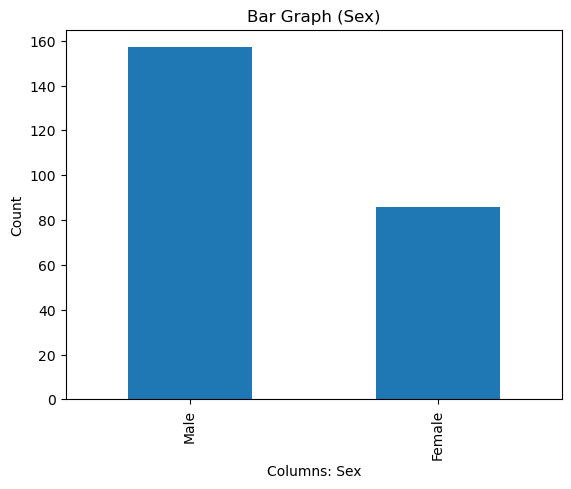

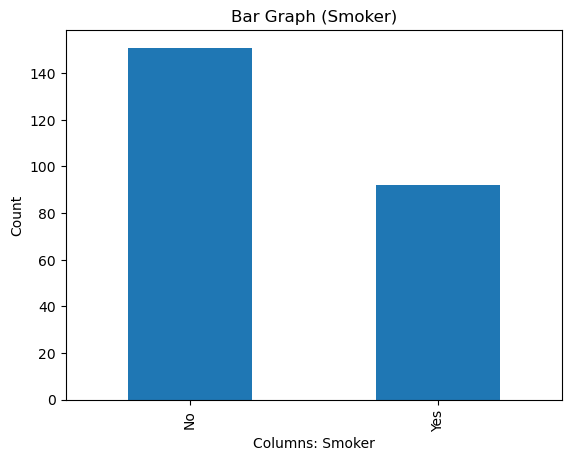

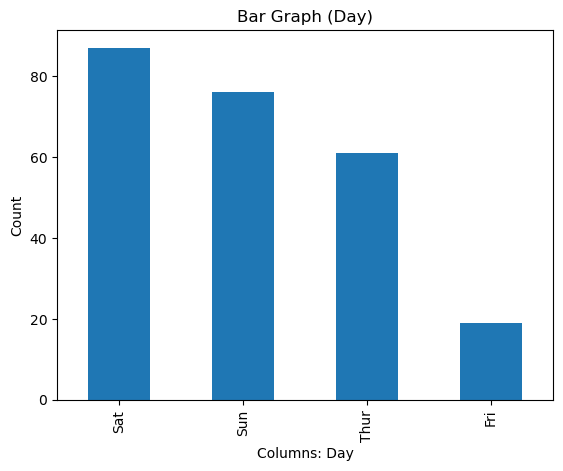

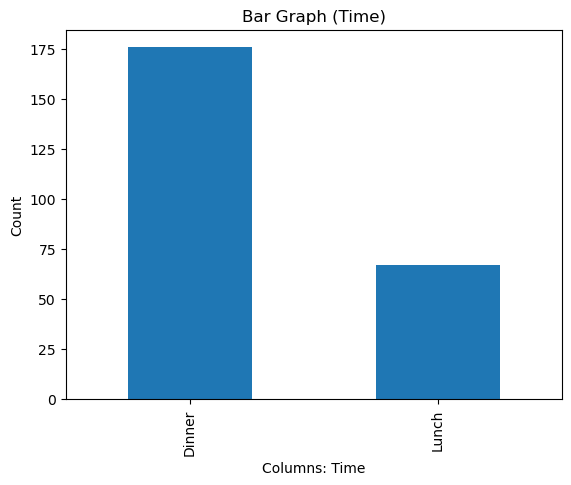

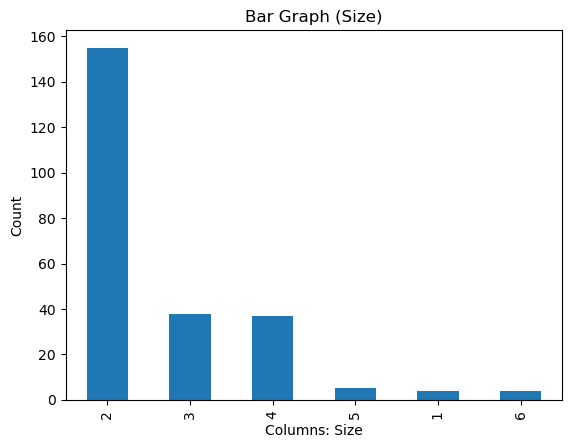

In [8]:
cols = ['sex', 'smoker', 'day', 'time', 'size']
for col in cols:
    barGraph(col)

#### Histogram

In [9]:
def hist(col):
    if col in df.columns:
        plt.hist(df[col])
        plt.xlabel(f"Columns: {col.capitalize()}")
        plt.ylabel("Count")
        plt.title(f'Histogram Graph ({col.capitalize()})')
        plt.show()
    else:
        print(f'No Column {col} in the dataset')

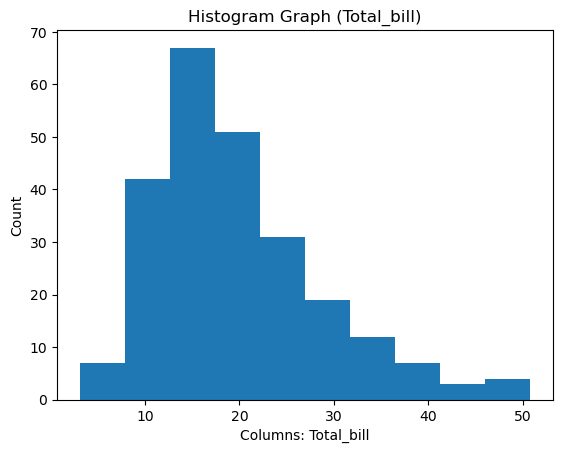

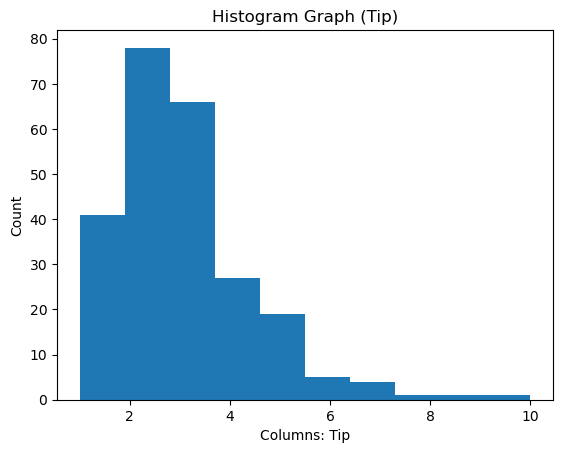

In [10]:
cols = ['total_bill', 'tip']
for col in cols:
    hist(col)

#### Boxplot

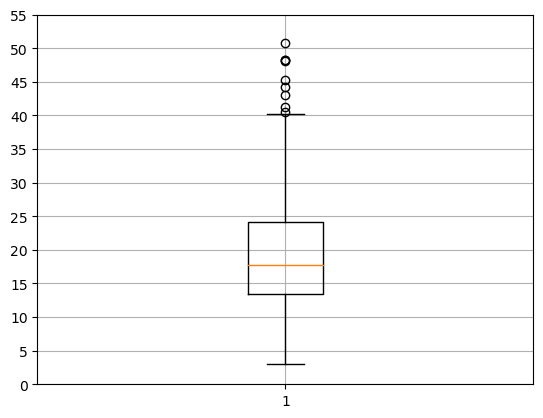

In [11]:
plt.boxplot(df['total_bill'])
plt.yticks(np.arange(0,60,5))
plt.grid(True)
plt.show()

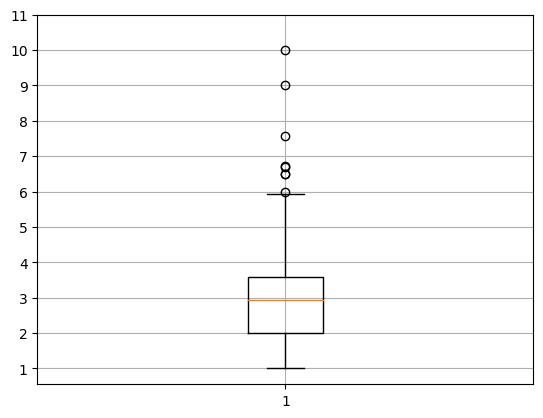

In [12]:
plt.boxplot(df['tip'])
plt.yticks(np.arange(1,12))
plt.grid(True)
plt.show()

#### Assigning integer values to string values

In [13]:
le = LabelEncoder()
categorical_columns = df.select_dtypes(include=['category', 'object']).columns
for col in categorical_columns:
    df[col] = le.fit_transform(df[col])

#### Correlation matrix

<AxesSubplot:>

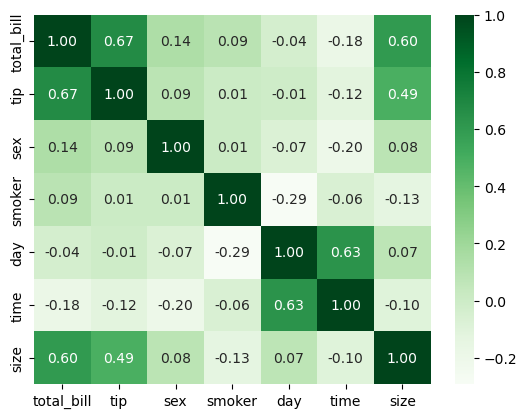

In [14]:
corr = df.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='Greens')

## MODEL BUILDING

#### Separating features and targets

In [15]:
# X = df[['total_bill', 'size']]
X = df.drop(columns = ['tip'], inplace=False)
y = df['tip']

#### Splitting the dataset into training and test dataset

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=89)

#### Building linear regression model

In [17]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

#### Predicting the target values

In [18]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

#### Model evaluation

In [19]:
train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print(f'Training RMSE: {train_rmse:.2f}')
print(f'Test RMSE: {test_rmse:.2f}')
print(f'Training R^2: {r2_train:.2f}')
print(f'Test R^2: {r2_test:.2f}')

Training RMSE: 1.03
Test RMSE: 0.97
Training R^2: 0.50
Test R^2: 0.07
